## Regularization:
* The word regularize means to make things regular or acceptable. 
* This is exactly why we use it for. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.
* This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero.
* The commonly used regularization techniques are : 
   * L1 regularization
   * L2 regularization
   * Dropout regularization
* A regression model which uses L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression. 
* A regression model that uses L2 regularization technique is called Ridge regression.    

## Introduction:

* When we use linear regression on a dataset after dividing data to training and test set, then calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting.
* **Overfitting**: If with respect to training dataset we are getting low error and for test dataset we are getting high error.
* **Underfitting**: If for both training and testing dataset we are getting high error.
* Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.
* In overfitting, we have high variance.
* **Note**: A good model should have low bias and low variance. Then this model is basically called as generalized model.

## Ridge Regression:
* We know that in linear regression we try to reduce cost function Σ(i=1 to M)(yi-ŷi)^2, but in ridge regression one more parameter is added to this equation:
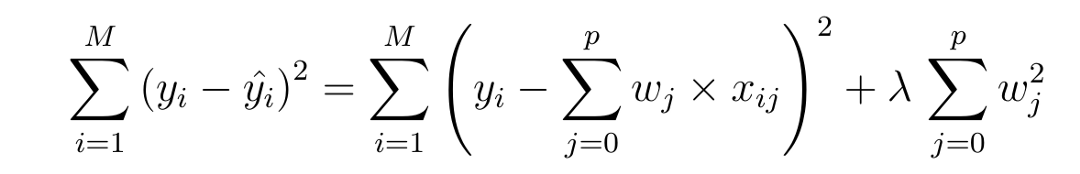

* Here the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients(i.e. slope in case of single independent feature).
* The λ parameter is the regularization penalty(which can be 0 >= λ <= any +ve value) and it is selected using cross validation, wj are the coeffiecients.
* Setting λ to 0 is the same as using the normal linear regression, while the larger its value, the stronger is the coefficients' size penalized.
* In case of ridge regression, we try to reduce coefficients value(slope value in simpler terms).
* For e.g: Let's consider a scenario where slope is very much steep, let's say it 1.3 and ad λ is 1, so 1 x (1.3)^2 = 1.69(we get last term of above image equation as 1.69). Now one best fit line gives this much, now we will go and calculate cost function for second best fit line. Let' say now it less steeper than last line(let's consider slope = 1.1), so last term of the eqn will be: 1 x (1.1)^2 = 1.21. Now similarly we will do some iterations till we get minimum last term value and best fit line. So here we can say that when our slope is high, then we are trying to penalize steeper slope.

* Here slope values tends to 0, it starts from high value and goes to almost 0(can't be 0 as squaring is done)
* Every technique has some pros and cons, so as Ridge regression. It decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient tending to zero rather only minimizes it. Hence, this model is not a good fit for feature reduction.


## Lasso Regression:
* The only difference from ridge regression here is instead of taking the square of the coefficients, magnitudes are taken into account.

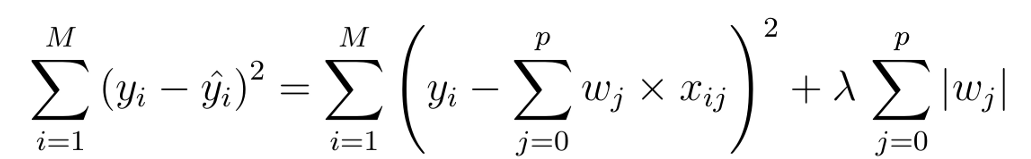

* This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.
* Suppose our equation is: y = m1x1 + m2x2+ m3x3 + m4x4 + c. So magnitude of slope will be λ*|m1+m2+m3+m4|
* In ridge regression, slope value was getting near to zero but in this case, slope will move towards zero. So here wherever, slope value is very very less or reached zero, those features will be removed, which means these features are not important for predicting best fit line.

## Ridge and Lasso Regression Implementation:

In [16]:
# Impor required libraries
import pandas as pd
import numpy as np

# Load a Regression dataset
from sklearn.datasets import load_boston

In [20]:
# Initialize dataset
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [21]:
# Converting data to dataframe
dataset = pd.DataFrame(df.data) # These only contains independent features
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
# Assign column names to dataset
dataset.columns = df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# Now for dependent feature
dataset["Price"] = df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# Now divide this to X and y
X = dataset.iloc[:, :-1]  # independent feature
y = dataset.iloc[:, -1]  # dependent feature

### We will implement linear regression, ridge regression and lasso regression, then we will compare the results

### Linear Regression:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # This is used to perform cross validation

lin_reg = LinearRegression()
# We are going to perform 5 cross validations
mse = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
# In scoring `neg_mean_squared_error` whatver value we get we make it as negative
# neg_mean_squared_error value should be near to zero, more it is close to 0, more model performs well
mean_mse = np.mean(mse)
mean_mse
# Here we can see value is negative, also we want this value to be close to 0

-37.131807467699055

### Ridge Regression:

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV  # To find value of λ

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]} # 1e-15 means 10^-15...
# alpha value should always be greater than 0 and can be any finite number 
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

# Alpha is λ value which selected as 100(from given options) which was best according to the GridSearchCV 
# Also we can see score is better than linear regression as it nearer to 0

{'alpha': 100}
-29.905701947540344


### Lasso Regression:

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did no

In [33]:
# Here we can λ is selected as 1
# Here score is better than linear regression
# Even though score of ridge is better than lasso, but it's not necessary as lasso also removes some features too
# Usually lasso performs better than ridge regression

# Now let's verify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

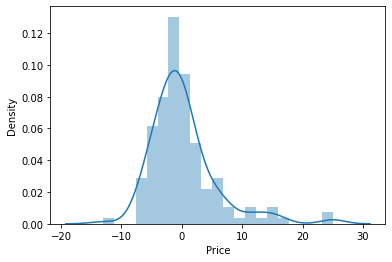

In [34]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

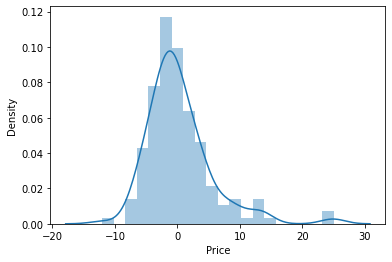

In [35]:
sns.distplot(y_test-prediction_ridge)

In [36]:
# We can see both the graphs are almost similar
# We might say lasso performs well because Lasso is generalized model ability to adapt properly to new unseen data,
# which overcomes overfitting with best features needed for model nd drops other. Ridge may overfit for new unseen data 